In [4]:
import pandas as pd
df1 = pd.read_csv('heart_data.csv')

data = df1.drop_duplicates()

print(data.dtypes)

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


df = 'cleaned_heart_data.csv'
data.to_csv(df, index=False)
print(df)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
cleaned_heart_data.csv


In [6]:
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_heart_data.csv')

sorted_data = df.sort_values(by=['age', 'chol'], ascending=[True, False])

filtered_data = sorted_data[(sorted_data['chol'] > 200) & (sorted_data['age'] > 40)]

grouped_data = filtered_data.groupby('sex').mean()

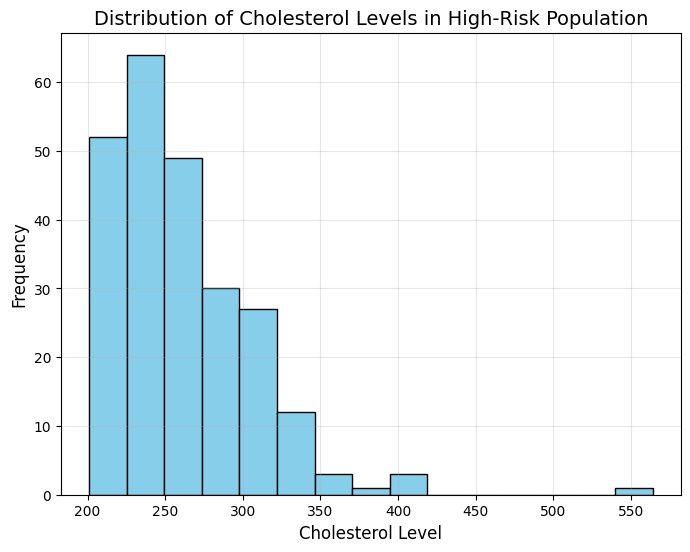

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['chol'], bins=15, color='blue', edgecolor='black')
plt.title('Distribution of Cholesterol Levels in High-Risk Population', fontsize=14)
plt.xlabel('Cholesterol Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


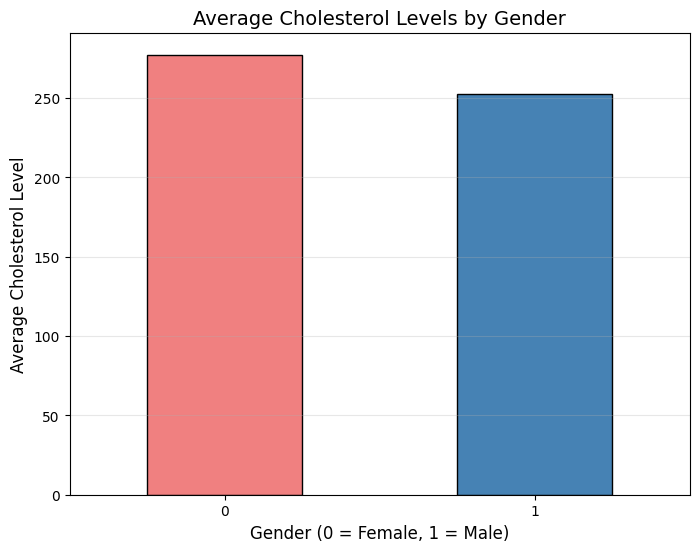

In [8]:
plt.figure(figsize=(8, 6))
grouped_data['chol'].plot(kind='bar', color=['lightcoral', 'steelblue'], edgecolor='black')
plt.title('Average Cholesterol Levels by Gender', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


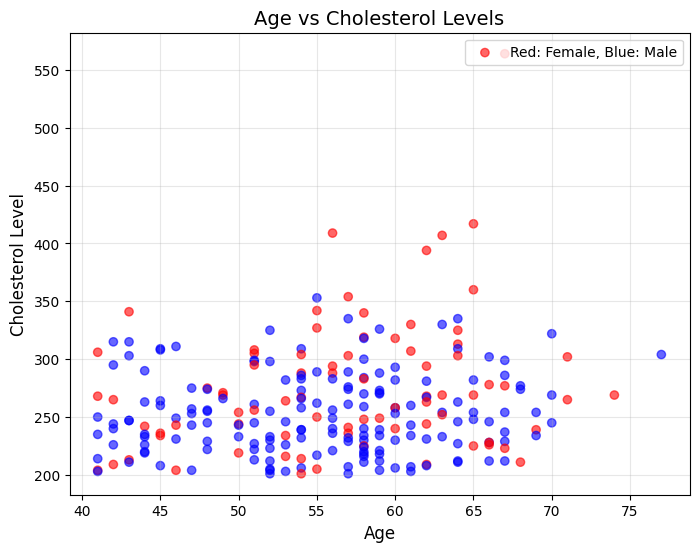

In [9]:
plt.figure(figsize=(8, 6))
colors = ['red' if sex == 0 else 'blue' for sex in filtered_data['sex']]
plt.scatter(filtered_data['age'], filtered_data['chol'], c=colors, alpha=0.6, label='Red: Female, Blue: Male')
plt.title('Age vs Cholesterol Levels', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol Level', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper right', fontsize=10)
plt.show()


In [11]:
descriptive_stats = df.describe().T
descriptive_stats['median'] = df.median()
descriptive_stats['mode'] = df.mode().iloc[0]

print(descriptive_stats)

correlation = df.corr()

print(correlation)

          count        mean        std    min     25%    50%     75%    max  \
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0   
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0   
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0   
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0   
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0   
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0   
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0   
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0   
exng      302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0   
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2   
slp       302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0   
caa       302.0    0.718543   1.006748    0.0    0.0